# Ads Click Through Rate (CTR) Optimization - Thomson Sampling Algorithm


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Importing dataset


In [45]:
dataset = pd.read_csv('./Ads_CTR_Optimisation.csv')
dataset.head()


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing Thomson Sampling Algorithm


In [46]:
import random

N = 10000  # Total number of users
d = 10  # Total number of ads
ads_selected = []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        number_of_rewards_1[ad] += 1
    else:
        number_of_rewards_0[ad] += 1
    total_reward += reward

## Visualizing the results

Text(0, 0.5, 'Number of times each ad was selected')

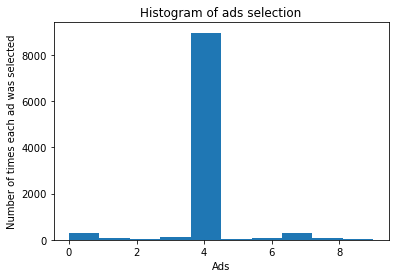

In [47]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')